<ipython-input-1-71fdcf76ae71>:27: RuntimeWarning: invalid value encountered in true_divide
  ax.plot(relative_perturbation_sizes, np.true_divide(LOR.sum(0),(LOR!=0).sum(0)), label=exp_name)
<ipython-input-1-71fdcf76ae71>:27: RuntimeWarning: invalid value encountered in true_divide
  ax.plot(relative_perturbation_sizes, np.true_divide(LOR.sum(0),(LOR!=0).sum(0)), label=exp_name)
<ipython-input-1-71fdcf76ae71>:27: RuntimeWarning: invalid value encountered in true_divide
  ax.plot(relative_perturbation_sizes, np.true_divide(LOR.sum(0),(LOR!=0).sum(0)), label=exp_name)
<ipython-input-1-71fdcf76ae71>:27: RuntimeWarning: invalid value encountered in true_divide
  ax.plot(relative_perturbation_sizes, np.true_divide(LOR.sum(0),(LOR!=0).sum(0)), label=exp_name)
<ipython-input-1-71fdcf76ae71>:27: RuntimeWarning: invalid value encountered in true_divide
  ax.plot(relative_perturbation_sizes, np.true_divide(LOR.sum(0),(LOR!=0).sum(0)), label=exp_name)
<ipython-input-1-71fdcf76ae71>:27: RuntimeWar

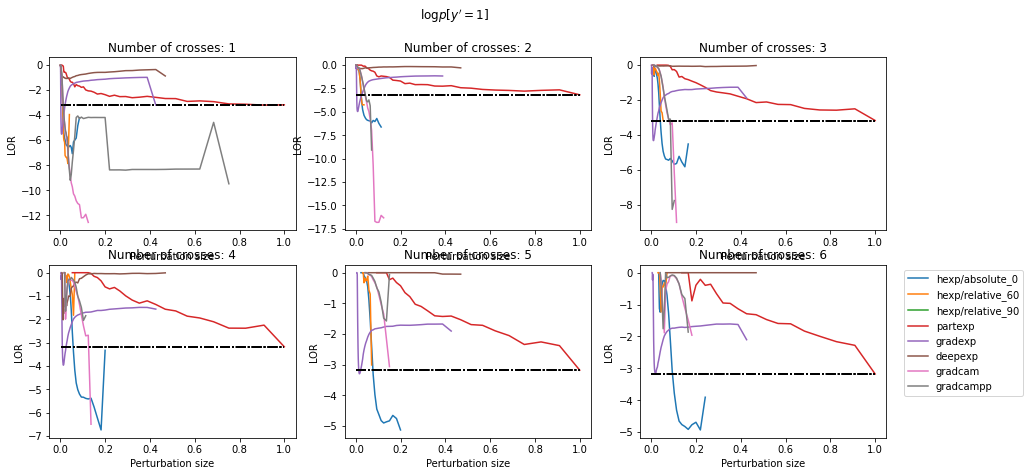

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn import metrics

# exp_x = np.linspace(-1, 0, 20)
# perturbation_sizes = np.sort(1.1 - 10 ** (exp_x))
A = 960*1280
exp_x = np.linspace(np.log10(1/A), 0, 100)
relative_perturbation_sizes = np.sort(10 ** (exp_x))
exp_mapper = ["hexp/absolute_0", "deepexp", "gradexp", "partexp"]

axes = fig.subplots(int(len(c)/3) if len(c)%3 == 0 else int(len(c)/3) + 1, 3)
for exp_name in exp_mapper:
    for j, n in enumerate(c):
        LOR = np.load(os.path.join("LOR", "%s/results_%d.npy" % (exp_name, n)))
        drop = []
        # for i, p in enumerate(relative_perturbation_sizes):
        #     c = LOR[:, i]
        #     nonzero_ids = np.where(c != 0)
        #     nonzero_c = c[nonzero_ids]
        #     drop.append(np.median(nonzero_c))
        ax = axes[int(j/3), j%3]
        # ax.plot(relative_perturbation_sizes, np.mean(LOR, axis=0), label=exp_name)
        ax.plot(relative_perturbation_sizes, np.true_divide(LOR.sum(0),(LOR!=0).sum(0)), label=exp_name)
        ax.plot(relative_perturbation_sizes, np.log10(6.6363e-04) * np.ones(len(relative_perturbation_sizes)), '-.k')    
        # ax.set_xscale("log")
        ax.set_xlabel("Perturbation size")
        ax.set_ylabel("LOR")
        ax.set_title("Number of crosses: %d" % n)
        if j == len(c)-1:
            ax.legend(bbox_to_anchor=(1.05, 1))      
fig.suptitle(r"$\log p[y'=1]$")
plt.savefig("LOR.eps")

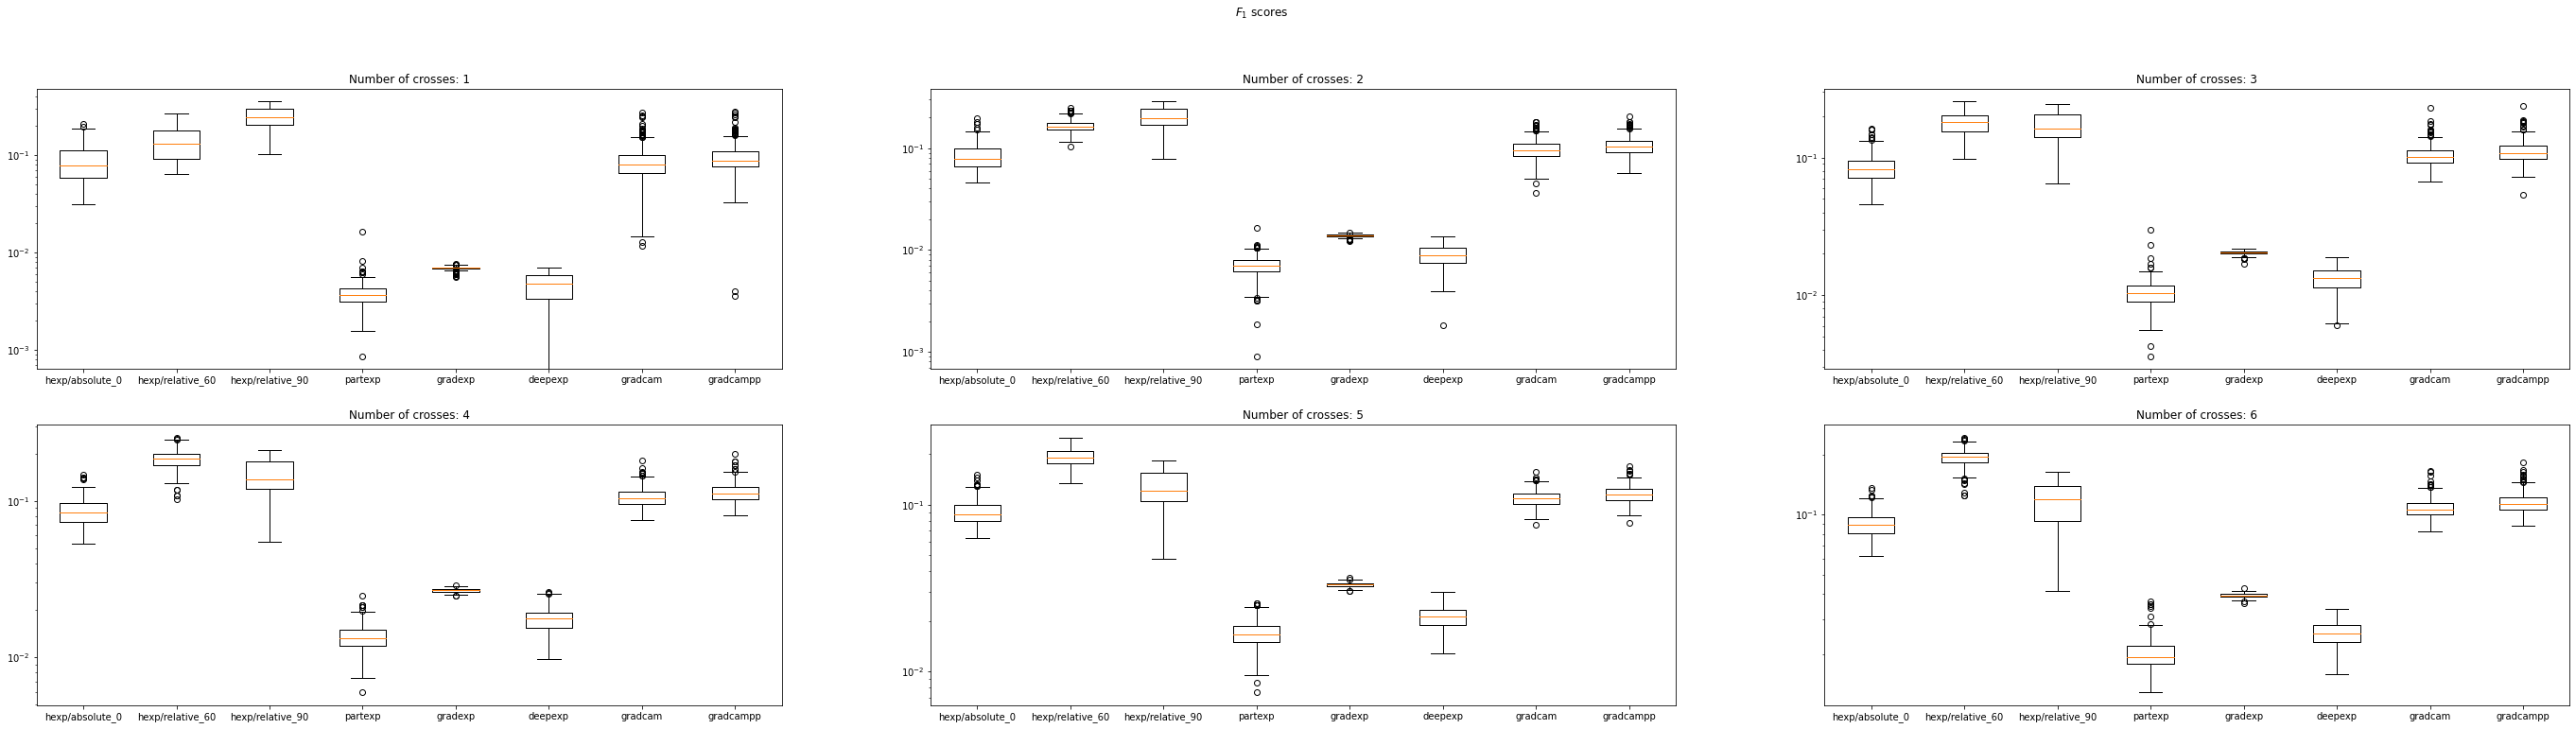

In [2]:
from PIL import Image

c = [1, 2, 3, 4, 5, 6]
true_positives = np.load("true_positives.npy", allow_pickle=True)

fig = plt.figure(figsize=(48, 12))
axes = fig.subplots(int(len(c)/3) if len(c)%3 == 0 else int(len(c)/3) + 1, 3)

for j, n in enumerate(c):
    data = []
    for exp_name in exp_mapper:
        explanation_dir = os.path.join("true_positive_explanations", exp_name)
        scores = []
        for i, image_path in enumerate(true_positives.item()[str(n)]):
            image = Image.open(image_path)
            # fig = plt.figure()
            # axes = fig.subplots(1, 2)
            # axes[0].imshow(image)
            image_name = os.path.basename(image_path)
            image_id = int(image_name.split("_")[1].split(".")[0])
            # print(image_name, image_id)
            ground_truth = np.zeros((100, 120))
            positions = np.load("/export/gaon1/data/jteneggi/data/synthetic/LOR/ground_truth/%d/ex%d_%d.npy" % (n, n, image_id))
            # print(positions)
            for position in positions:
                top_left = position[0]
                bottom_right = position[1]
                for k in range(9):
                    ground_truth[top_left[1]+k, top_left[0]+k] = 1
                    ground_truth[bottom_right[1]-k, top_left[0]+k] = 1
                # ground_truth[top_left[1]:bottom_right[1]+1, top_left[0]:bottom_right[0]+1] = 1
            # axes[0].imshow(ground_truth)
            if exp_name == "naive":
                explanation = torch.rand(image.size(1), image.size(2), device=torch.device("cpu")) + .5
            else:
                explanation = np.load(os.path.join(explanation_dir, "%s.npy" % image_name))
            score = metrics.f1_score(ground_truth.flatten(), explanation.flatten() > 0)
            scores.append(score)
            # axes[1].imshow(explanation)
        data.append(scores)
    ax = axes[int(j/3), j%3]
    ax.boxplot(data, labels=exp_mapper)
    ax.set_yscale("log")
    ax.set_title("Number of crosses: %d" % n)
fig.suptitle(r"$F_1$ scores")
plt.savefig("f1_scores.eps")

In [3]:
from sklearn import metrics

truth = np.array([0, 0, 1])
pred = np.array([2, 3, 4]) >= 3
metrics.f1_score(truth, pred)

0.6666666666666666

In [4]:
LOR = np.load(os.path.join("LOR", "%s/results_%d.npy" % ("hexp/absolute_0", 2)))
print(LOR[:, 70])

[ -5.157123   -3.7403777 -10.282275    0.         -5.3398194   0.
   0.          0.         -4.8833127  -7.0948057   0.         -7.9458475
   0.         -9.0844755 -10.5732975   0.         -7.4541044  -3.094149
  -3.379959   -4.9640346   0.         -4.1564183   0.        -11.280858
  -5.9342117  -3.3330932  -5.122498   -3.8708773  -4.3909183  -9.861261
   0.          0.         -5.0713305   0.          0.         -5.68801
   0.         -8.229649    0.          0.        -11.343658    0.
   0.          0.          0.        -10.067062  -11.0079565  -3.2868416
 -13.865972  -15.294822   -4.614493    0.          0.         -6.64522
  -3.1780767   0.         -3.282652    0.         -3.5549016   0.
   0.         -6.149956    0.         -2.3092318  -3.1757936  -6.3757844
  -3.1780767  -5.88717    -4.646239   -4.0763927   0.         -5.641463
  -3.1770954 -11.818119   -3.6937919  -5.3452654   0.         -4.7667913
   0.         -4.822951   -3.9738944  -3.1780767   0.          0.
 -17.044277   